In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta

In [2]:
files_path = r"C:\Users\mehmetg\jupyter\EPIAS_Production-Rolling_Source-Based"
files = os.listdir(files_path)
files = [f for f in files if ".csv" in f]

In [3]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(os.path.join(files_path,file), header=0, index_col=0, parse_dates=True))

In [4]:
df = pd.concat(dfs).sort_index()
daily = df.resample("D").mean()
today = datetime.today().replace(hour=0, minute=0,second=0,microsecond=0)
daily = daily[:today-timedelta(days=1)]
# dam = daily['Dam']
# ror = daily['Run-of-River']
# hydro = dam+ror

In [5]:
def seag(ts):
    seag = ts.groupby([ts.index.dayofyear, ts.index.year]).first().unstack()
    return seag

In [6]:
# dam_seag = seag(dam.rolling(7).mean())
# ror_seag = seag(ror.rolling(7).mean())
# hydro_seag = seag(hydro.rolling(7).mean())

In [7]:
def plot_seag(seag, title=""):
    plt.figure(figsize=(8,5))
    plt.fill_between(
        seag.index, seag[seag.columns[:-1]].min(axis=1),
        seag[seag.columns[:-1]].max(axis=1), color="gray")
    plt.plot(seag[today.year], color="red", label=today.year)
    plt.plot([2015-2020], color="gray", label="2015-2020")
    plt.title(title, loc="left")
    plt.grid(True)
    plt.legend(loc=0)
    plt.xlim(seag.index.min(), seag.index.max())
    plt.show()

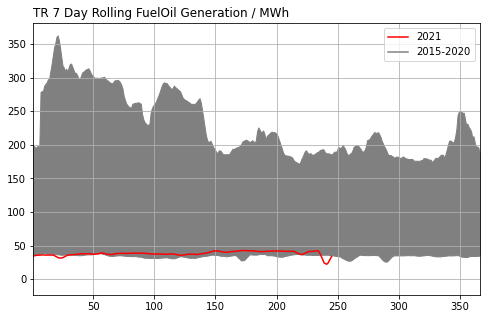

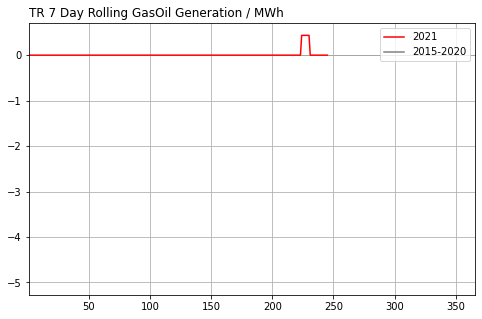

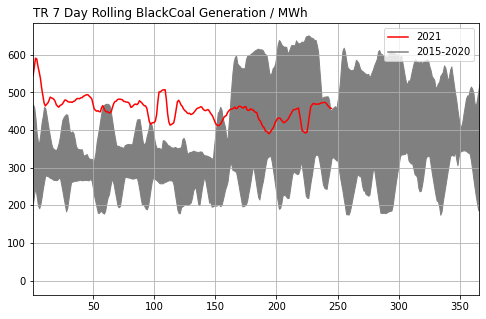

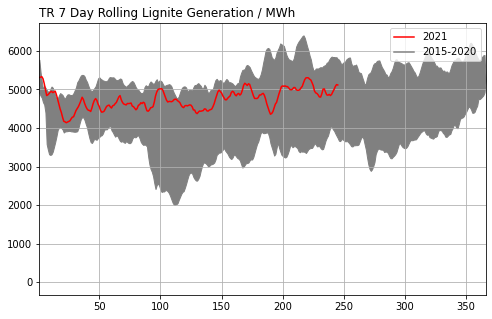

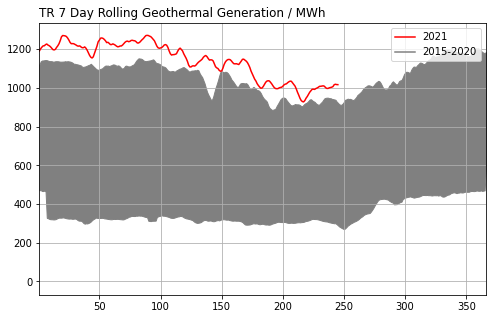

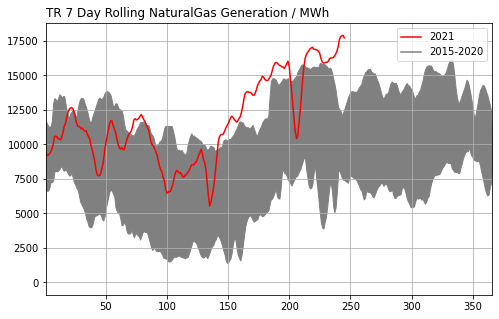

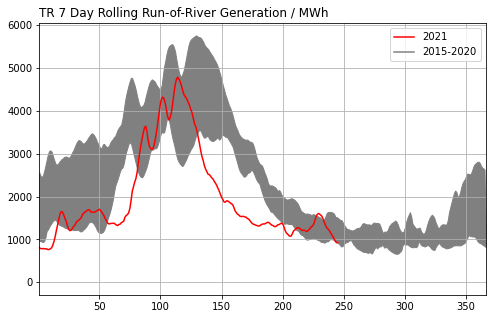

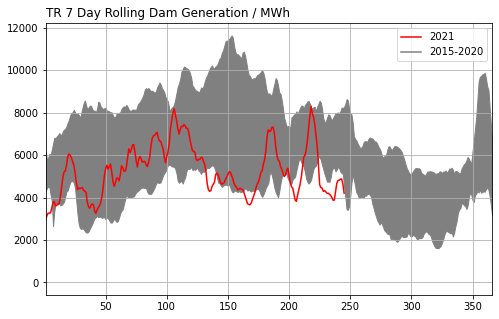

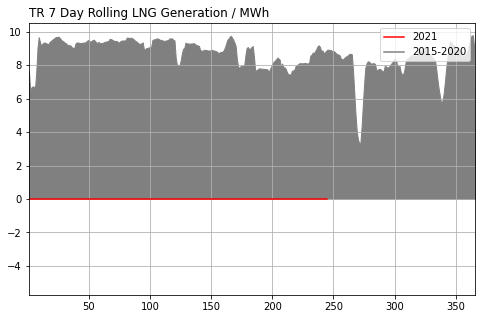

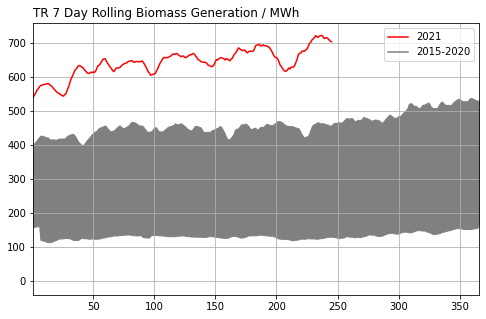

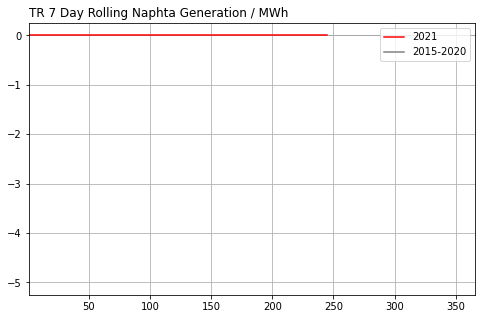

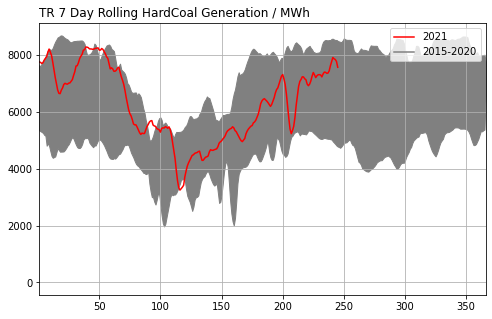

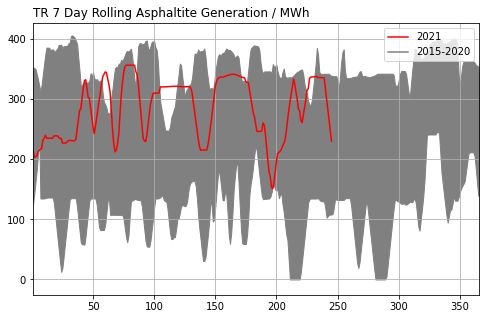

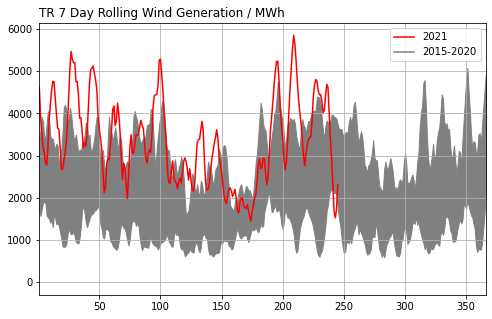

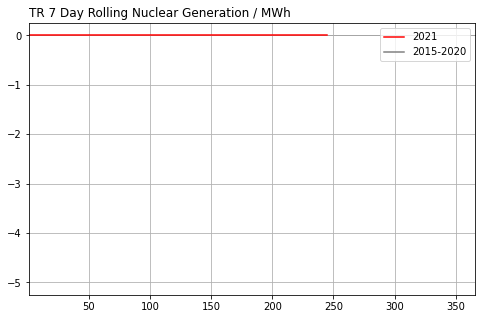

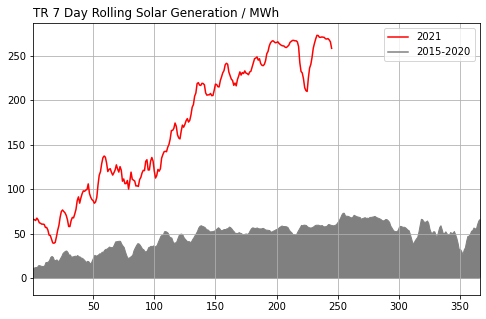

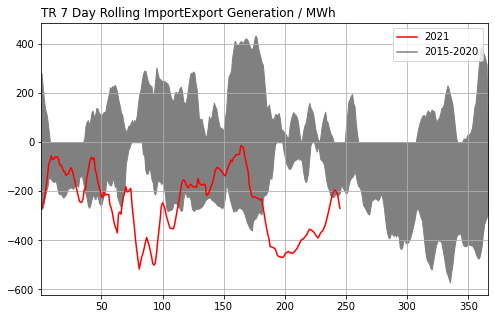

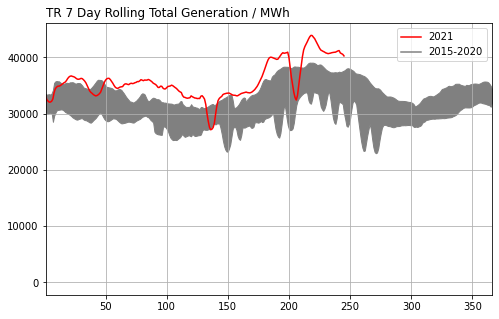

In [8]:
for col in df.columns:
    df_seag = seag(df[col].resample("D").mean()[:today-timedelta(days=1)].rolling(7).mean())
    plot_seag(df_seag, "TR 7 Day Rolling {} Generation / MWh".format(col))

In [9]:
d1 = df['2021-06-01':].head(24)['Run-of-River']
d2 = df['2021-05-30':].head(24)['Run-of-River']
d3 = df['2021-05-24':].head(24)['Run-of-River']

In [10]:
d1.index = d1.index.hour
d2.index = d2.index.hour
d3.index = d3.index.hour

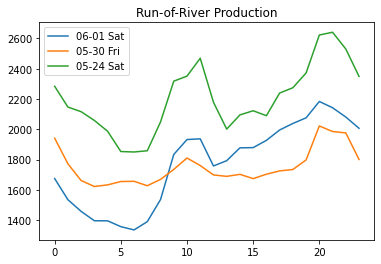

In [11]:
plt.plot(d1, label="06-01 Sat")
plt.plot(d2, label="05-30 Fri")
plt.plot(d3, label="05-24 Sat")
plt.title("Run-of-River Production")

plt.legend(loc=0)
plt.show()